# Lab 2: Advanced Data Visualization with Seaborn
**Name:** Vandan Amin  
**Dataset:** Hepatitis C Virus (HCV) Data  
**Source:** UCI Machine Learning Repository  
[Link to Dataset](https://archive.ics.uci.edu/dataset/571/hcv+data)

## Dataset Overview
This dataset provides results from various lab tests for patients being evaluated for Hepatitis C. It includes measurements of liver enzymes and proteins, such as ALT, AST, BIL, and others, along with demographic information like age and sex. The `Category` column represents patient diagnosis with values:

- `0` = Blood Donor  
- `0s` = Suspect Blood Donor  
- `1` = Hepatitis  
- `2` = Fibrosis  
- `3` = Cirrhosis

We'll use this dataset to explore potential patterns across different patient groups using Seaborn.


In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Preview the data
df = pd.read_csv("hcvdat0.csv")
df.head()

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


## Plot 1: Distribution of Diagnostic Categories

### What the Graph Shows:
This count plot shows the number of patients (y-axis) in each diagnostic category (x-axis), including Blood Donor, Suspect Donor, Hepatitis, Fibrosis, and Cirrhosis. The categories have been color-coded for better distinction.

### Key Observations:
- The majority of samples come from **Blood Donors**, with nearly 540 entries, suggesting a class imbalance.
- **Suspect Donors** form the second-largest group but are much fewer in number (~24 samples).
- **Cirrhosis**, **Fibrosis**, and **Hepatitis** groups each have under 50 samples.
- The overall distribution is heavily skewed toward healthy individuals (blood donors).

### Interpretation:
This imbalance could impact any analysis or modeling. Predictive models trained on this dataset may perform poorly for less-represented categories unless adjusted (e.g., class weighting or resampling). From a health data perspective, this may reflect real-world screening outcomes, where healthy individuals are more prevalent in blood bank records.

### Visual Effectiveness:
The bar chart format is ideal for comparing category counts. Color coding improves readability by helping differentiate bars without relying solely on the x-axis labels. The rotated labels and concise layout enhance clarity.

### Expressiveness:
This plot clearly communicates the distribution of patients across diagnostic categories. Each bar represents a distinct category, and the use of color and labels ensures that the information is easy to interpret at a glance. The visualization is well-suited for summarizing categorical data and helps establish a foundational understanding of the dataset’s composition.


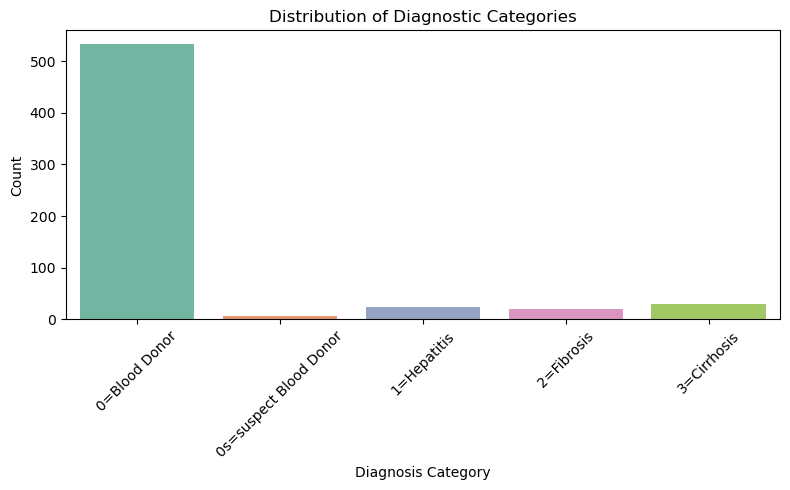

In [49]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x="Category", hue="Category", palette="Set2", legend=False)
plt.title("Distribution of Diagnostic Categories")
plt.xlabel("Diagnosis Category")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("VandanAmin_DiagnosticCategoryCount.png")
plt.show()

## Plot 2: Age Distribution by Diagnosis

### What the Plot Shows:
This box plot compares the ages of patients across different diagnosis categories. Each box shows the spread of ages for that group — including the median, lower and upper quartiles, and any outliers.

### What Stands Out:
- **Blood Donors** have a wide age range, but most are between 20 and 40.
- **Suspect Donors** and **Hepatitis** patients are also mostly in that 30–40 range.
- **Fibrosis** and **Cirrhosis** groups lean older, with most patients between 40 and 60.
- The oldest patients in the dataset (around 70+) are mostly in the Cirrhosis group.

### Why It Matters:
There’s a clear age shift as the conditions get more serious. Younger people are more likely to be donors or have mild conditions, while older patients show up more often in the fibrosis and cirrhosis categories. This could reflect how liver disease tends to progress over time.

### How It Works Visually:
The box plot makes it easy to spot differences in age spread between groups. Using color keeps things separated without making it messy, and the single box per category helps focus on the median and variation without distraction.


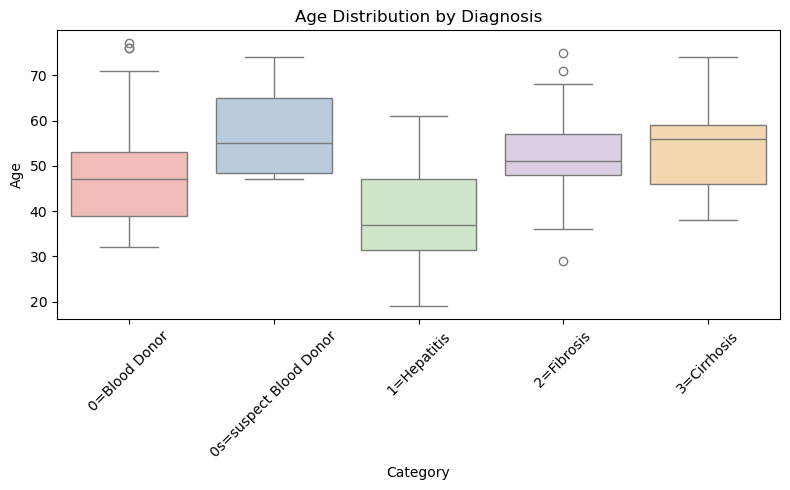

In [51]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x="Category", y="Age", hue="Category", palette="Pastel1", dodge=False, legend=False)
plt.title("Age Distribution by Diagnosis")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("VandanAmin_AgeDistribution.png")
plt.show()

## Plot 3: Correlation Between Lab Test Results

### What the Plot Shows:
This is a heatmap showing how the different blood test values are related to each other. Each square shows the correlation between two features — values close to 1 mean a strong positive relationship, while values close to -1 would show a negative one.

### What Stands Out:
- **ALT** and **AST**, two liver enzymes, have a strong positive correlation (~0.74), which makes sense since both increase with liver damage.
- **ALP** has some moderate correlation with **GGT** and **BIL**, both of which are also liver-related.
- **CHOL** and **CREA** don’t show much connection with most other features.
- The diagonal is always 1 because that’s each feature compared to itself.

### Why It Matters:
This kind of chart is useful when you want to see which test values tend to rise or fall together. It can help reduce redundancy if you’re building a model — for example, if ALT and AST are very similar, you might only need one. It also highlights which features could be grouped for further analysis.

### How It Works Visually:
The heatmap uses both color intensity and numbers to make the relationships clear. The red-to-blue color scale is easy to read, and having the values printed inside the squares adds clarity. The layout makes it simple to spot high or low correlations at a glance.


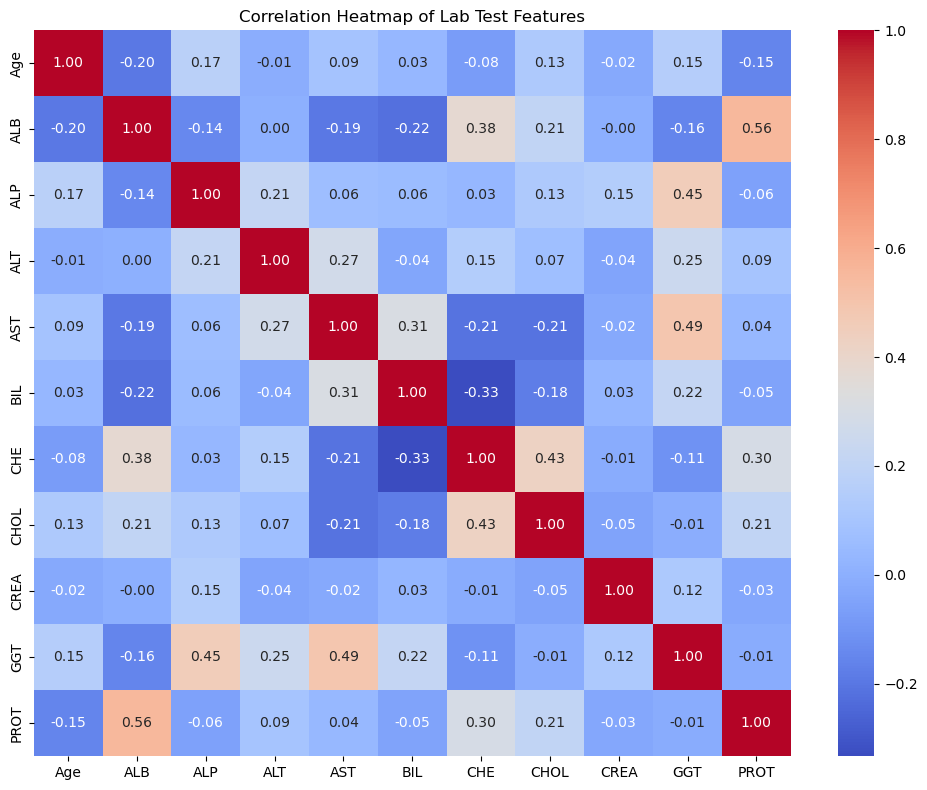

In [53]:
# use only numeric coloumns
numeric_cols = ['Age', 'ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT']
plt.figure(figsize=(10, 8))
sns.heatmap(df[numeric_cols].corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap of Lab Test Features")
plt.tight_layout()
plt.savefig("VandanAmin_HeatmapCorrelations.png")
plt.show()

## Plot 4: ALT vs AST by Diagnosis

### What the Plot Shows:
This scatter plot compares ALT and AST levels for each patient, with points colored by their diagnosis group. ALT and AST are liver enzymes that usually rise when the liver is under stress.

### What Stands Out:
- Most **Blood Donor** points are clustered in the lower-left corner — ALT and AST levels are low.
- As you move up and to the right, more **Hepatitis**, **Fibrosis**, and **Cirrhosis** patients show up, with higher values for both enzymes.
- There are a few extreme values (like ALT above 100 or AST above 150), and those usually belong to the more serious categories.

### Why It Matters:
This plot shows a clear pattern: higher ALT and AST levels are more common in patients with liver disease. It helps confirm that these enzymes are good indicators of liver function. A model or a doctor might use this kind of info when making a diagnosis.

### How It Works Visually:
The scatter plot is a great fit here because it shows the relationship between two features, and the color coding by category adds another layer without overcrowding the graph. It’s easy to spot the trend and see which groups overlap or stand out.


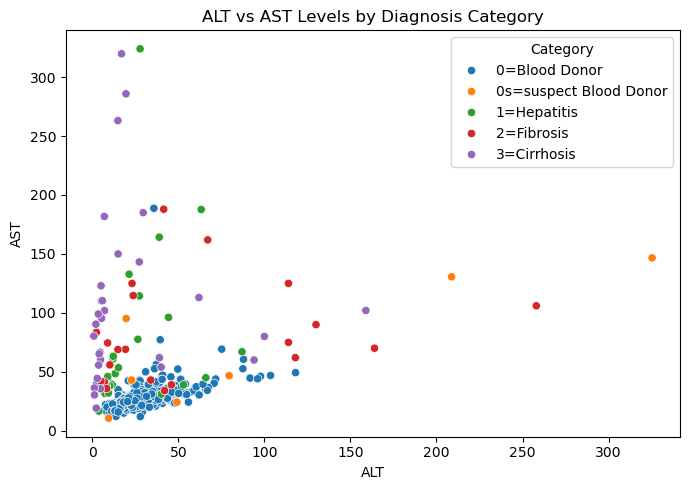

In [38]:
plt.figure(figsize=(7, 5))
sns.scatterplot(data=df, x="ALT", y="AST", hue="Category")
plt.title("ALT vs AST Levels by Diagnosis Category")
plt.tight_layout()
plt.savefig("VandanAmin_ALTvsAST.png")
plt.show()

## Plot 5: Bilirubin Levels by Diagnosis

### What the Plot Shows:
This violin plot shows the distribution of Bilirubin (BIL) levels across each diagnosis group. It’s basically a box plot combined with a smoothed histogram, so you get both the spread and the shape of the data.

### What Stands Out:
- **Blood Donors** have low BIL levels, mostly under 1.0.
- **Hepatitis**, **Fibrosis**, and especially **Cirrhosis** patients show wider distributions and higher peaks.
- **Cirrhosis** has a few cases with very high BIL (over 3), which matches what you'd expect since elevated BIL can mean serious liver issues.

### Why It Matters:
Bilirubin is a key marker in liver health — high levels usually mean something’s wrong. This plot makes it clear that patients with liver disease tend to have higher and more varied BIL values compared to healthy people. That makes it a strong feature for analysis or prediction.

### How It Works Visually:
The violin plot works well here because it shows more than just the median — it reveals the full shape of the distribution. You can tell how values are spread out, where most of the data is concentrated, and how the conditions differ from each other.


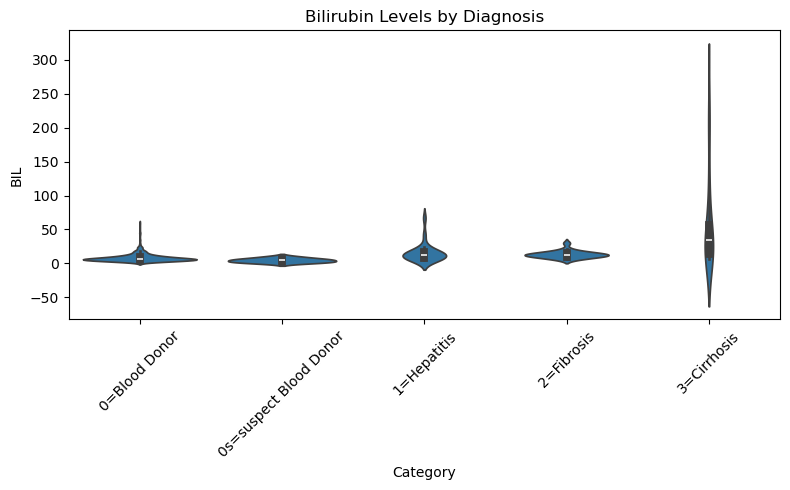

In [34]:
plt.figure(figsize=(8, 5))
sns.violinplot(data=df, x="Category", y="BIL")
plt.title("Bilirubin Levels by Diagnosis")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("VandanAmin_BilirubinDistribution.png")
plt.show()